In [1]:
import pandas as pd

data = pd.read_csv("E-commerce.csv")

data.head()

,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember
0,1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No
1,2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes
2,3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes
3,4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes
4,5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No


In [3]:
data.describe()

,CustomerID,Age,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,250.500000,44.170000,1065.050731,14.308000,2.93400,3.008000,3.0780,3.082000,0.252280,251.181010
std,144.481833,14.813777,583.199658,8.151197,1.41054,1.372481,1.4156,1.415374,0.149674,141.531993
min,1.000000,18.000000,51.799790,1.000000,1.00000,1.000000,1.0000,1.000000,0.000000,0.772696
25%,125.750000,32.000000,535.083407,7.000000,2.00000,2.000000,2.0000,2.000000,0.110000,133.672231
50%,250.500000,44.000000,1100.884065,14.000000,3.00000,3.000000,3.0000,3.000000,0.260000,251.940355
75%,375.250000,58.000000,1584.348124,22.000000,4.00000,4.000000,4.0000,4.000000,0.380000,371.692341
max,500.000000,69.000000,1999.655968,29.000000,5.00000,5.000000,5.0000,5.000000,0.500000,499.813315


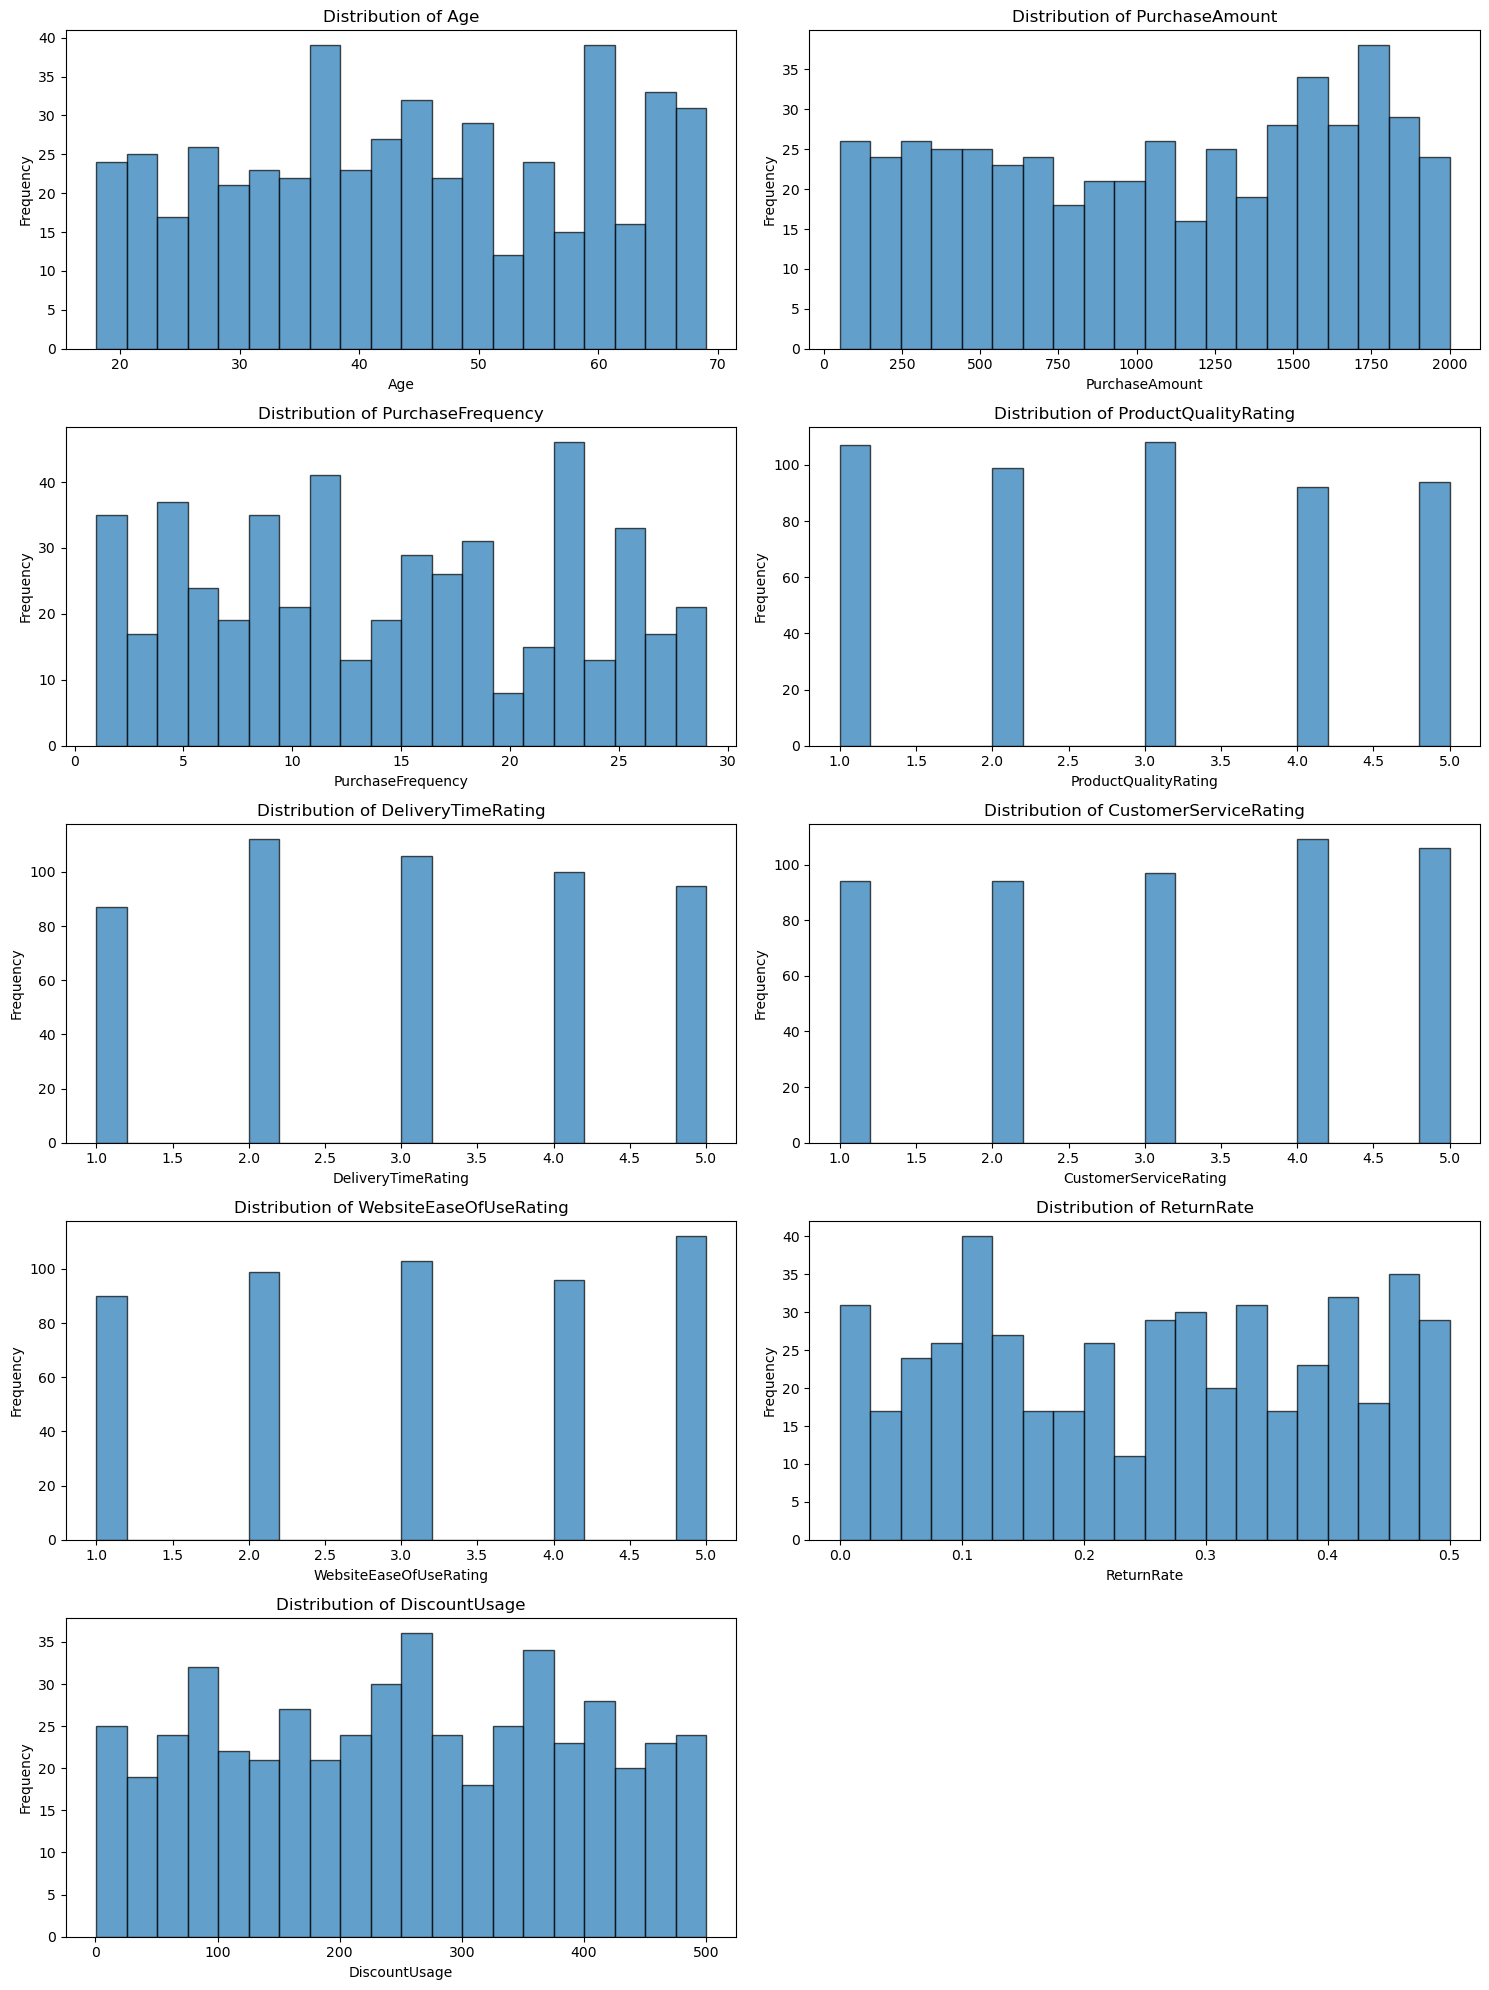

In [9]:
import matplotlib.pyplot as plt

numeric_cols = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    plt.hist(data[col], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [57]:
# create age groups

bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']

data["AgeGroups"] = pd.cut(data["Age"], bins = bins, labels = labels, right = False)

# select only the numeric columns for calculation
numeric_columns = ["ProductQualityRating", "DeliveryTimeRating", "CustomerServiceRating", "WebsiteEaseOfUseRating"]

# calculate mean ratings by age group and gender
mean_ratings_age_gender = data.groupby(["AgeGroups", "Gender"])[numeric_columns].mean()

# reset the index to display the dataframe
mean_ratings_age_gender.reset_index(inplace = True)

print(mean_ratings_age_gender)

  AgeGroups  Gender  ProductQualityRating  DeliveryTimeRating  \
0     18-29  Female              3.052632            3.210526   
1     18-29    Male              2.933333            3.000000   
2     30-39  Female              2.929825            2.859649   
3     30-39    Male              3.080000            2.820000   
4     40-49  Female              3.090909            2.890909   
5     40-49    Male              2.857143            3.166667   
6     50-59  Female              2.945946            2.945946   
7     50-59    Male              2.833333            2.895833   
8     60-69  Female              2.900000            3.300000   
9     60-69    Male              2.673469            2.938776   

   CustomerServiceRating  WebsiteEaseOfUseRating  
0               3.175439                2.912281  
1               3.333333                3.355556  
2               2.912281                3.070175  
3               2.980000                2.880000  
4               3.036364     

C:\Users\DELL INDIA\AppData\Local\Temp\ipykernel_2252\1249299895.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ratings_age_gender = data.groupby(["AgeGroups", "Gender"])[numeric_columns].mean()


In [21]:
# select only the numeric columns for calculation
numeric_columnss = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

# calculate mean ratings by loyalty program membership
mean_ratings_loyalty = data.groupby("LoyaltyProgramMember")[numeric_columnss].mean()

# reset the index to display the dataframe
mean_ratings_loyalty.reset_index(inplace = True)

print(mean_ratings_loyalty)

  LoyaltyProgramMember  ProductQualityRating  DeliveryTimeRating  \
0                   No              2.920502            2.916318   
1                  Yes              2.946360            3.091954   

   CustomerServiceRating  WebsiteEaseOfUseRating  ReturnRate  DiscountUsage  
0               2.987448                3.108787    0.251883     241.426710  
1               3.160920                3.057471    0.252644     260.113108  


In [43]:
# define NPS categories based on customer service rating
data["NPS_Category"] = pd.cut(data["CustomerServiceRating"], bins = [0, 6, 8, 10], labels = ['Detractors', 'Passives', 'Promoters'], right = False)

# calculate NPS
nps_count = data["NPS_Category"].value_counts(normalize = True) * 100
nps_score = nps_count["Promoters"] - nps_count["Detractors"]

print("The NPS Count is:", nps_count)
print("The NPS Score is:", nps_score)

The NPS Count is: NPS_Category
Detractors    100.0
Passives        0.0
Promoters       0.0
Name: proportion, dtype: float64
The NPS Score is: -100.0


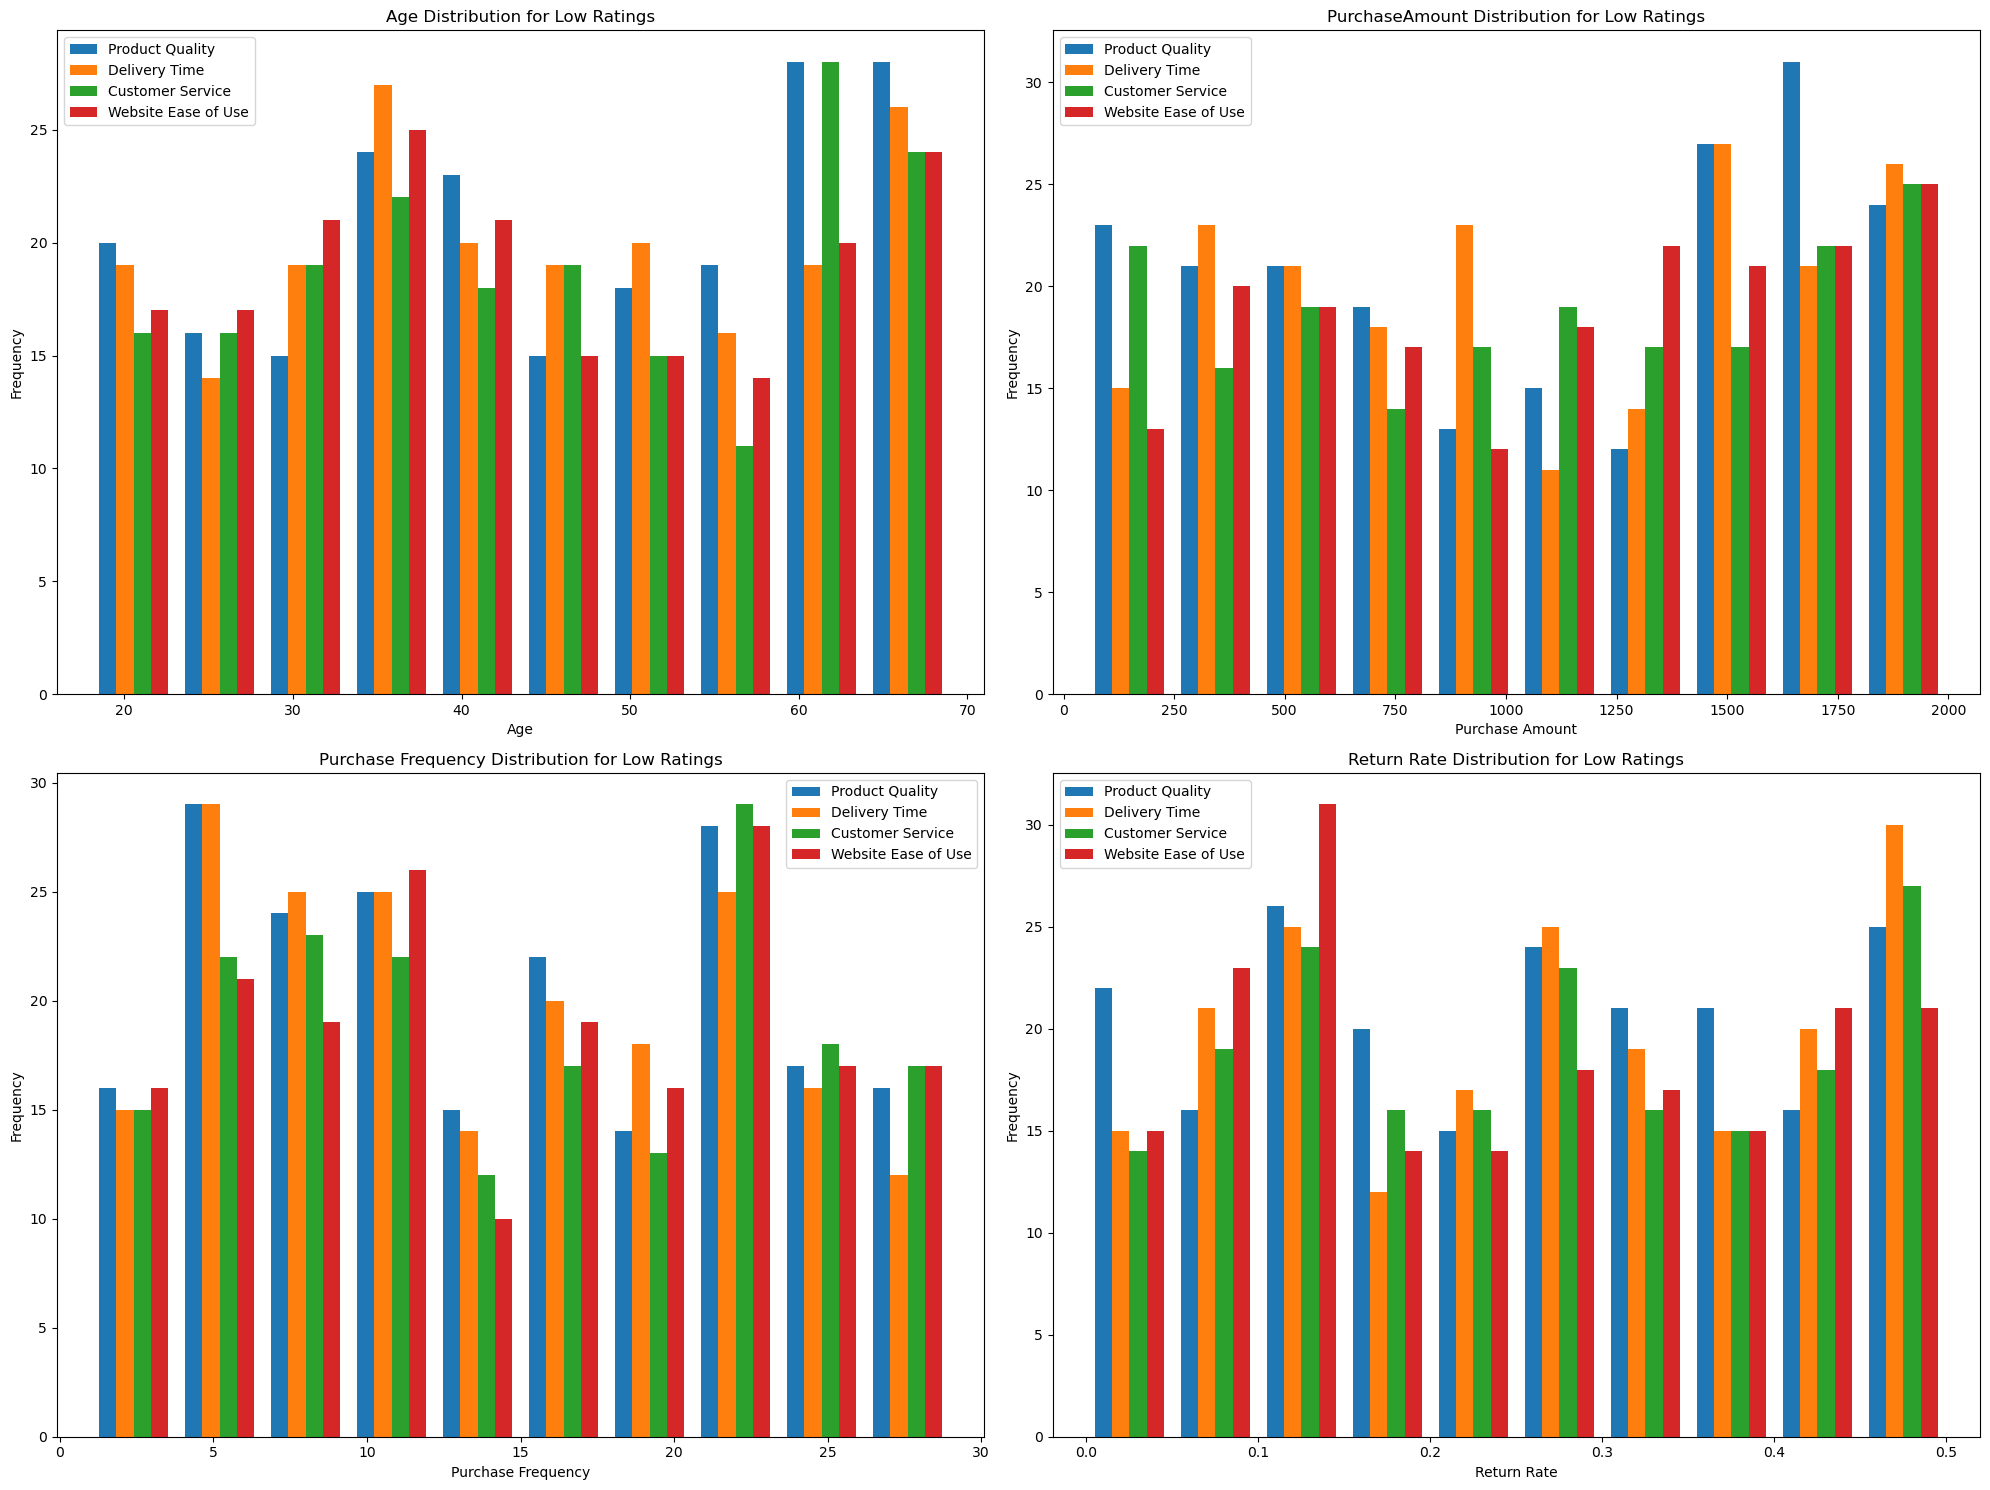

In [55]:
# Root Cause Analysis for Low Satisfaction

# define low rating threshold
low_rating_threshold = 2

# create subsets for low ratings in different aspects
low_product_quality = data[data["ProductQualityRating"] <= low_rating_threshold]
low_delivery_time = data[data["DeliveryTimeRating"] <= low_rating_threshold]
low_cutomer_service = data[data["CustomerServiceRating"] <= low_rating_threshold]
low_website_use_of_use = data[data["WebsiteEaseOfUseRating"] <= low_rating_threshold]

# plot the characteristics for each low rating subset
plt.figure(figsize = (20,15))

# age distribution for low ratings
plt.subplot(2,2,1)
plt.hist([low_product_quality["Age"], low_delivery_time["Age"], low_cutomer_service["Age"], low_website_use_of_use["Age"]], bins = 10, label = ["Product Quality", "Delivery Time", "Customer Service", "Website Ease of Use"])
plt.title("Age Distribution for Low Ratings")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()

# purchase amount distribution for low ratings
plt.subplot(2,2,2)
plt.hist([low_product_quality["PurchaseAmount"], low_delivery_time["PurchaseAmount"], low_cutomer_service["PurchaseAmount"], low_website_use_of_use["PurchaseAmount"]], bins = 10, label = ["Product Quality", "Delivery Time", "Customer Service", "Website Ease of Use"])
plt.title("PurchaseAmount Distribution for Low Ratings")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.legend()

# Purchase frequency distribution for low ratings
plt.subplot(2,2,3)
plt.hist([low_product_quality["PurchaseFrequency"], low_delivery_time["PurchaseFrequency"], low_cutomer_service["PurchaseFrequency"], low_website_use_of_use["PurchaseFrequency"]], bins = 10, label = ["Product Quality", "Delivery Time", "Customer Service", "Website Ease of Use"])
plt.title("Purchase Frequency Distribution for Low Ratings")
plt.xlabel("Purchase Frequency")
plt.ylabel("Frequency")
plt.legend()

# Purchase frequency distribution for low ratings
plt.subplot(2,2,4)
plt.hist([low_product_quality["ReturnRate"], low_delivery_time["ReturnRate"], low_cutomer_service["ReturnRate"], low_website_use_of_use["ReturnRate"]], bins = 10, label = ["Product Quality", "Delivery Time", "Customer Service", "Website Ease of Use"])
plt.title("Return Rate Distribution for Low Ratings")
plt.xlabel("Return Rate")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()